In [1]:
import pandas as pd

# Loading the metadata CSV file
metadata_path = './ISIC_2019_Training_Metadata.csv'
metadata_df = pd.read_csv(metadata_path)

# Display the first few rows of the dataframe
metadata_df.head()


,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [2]:
# Summary statistics for age
age_summary = metadata_df['age_approx'].describe()

# Distribution of sex
sex_distribution = metadata_df['sex'].value_counts()

# Distribution of anatomical site
anatom_site_distribution = metadata_df['anatom_site_general'].value_counts()

# Create a summary table
summary_table = pd.DataFrame({
    'Metric': ['Age', 'Sex', 'Anatomical Site'],
    'Details': [age_summary.to_dict(), sex_distribution.to_dict(), anatom_site_distribution.to_dict()]
})

# Adjust display settings
pd.set_option('display.max_colwidth', None)  # Set to None to display the full content of each column
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping for wide DataFrames

# Display the summary table
summary_table


,Metric,Details
0,Age,"{'count': 24894.0, 'mean': 54.02848075841568, 'std': 18.130971451746515, 'min': 0.0, '25%': 40.0, '50%': 55.0, '75%': 70.0, 'max': 85.0}"
1,Sex,"{'male': 13286, 'female': 11661}"
2,Anatomical Site,"{'anterior torso': 6915, 'lower extremity': 4990, 'head/neck': 4587, 'upper extremity': 2910, 'posterior torso': 2787, 'palms/soles': 398, 'oral/genital': 59, 'lateral torso': 54}"


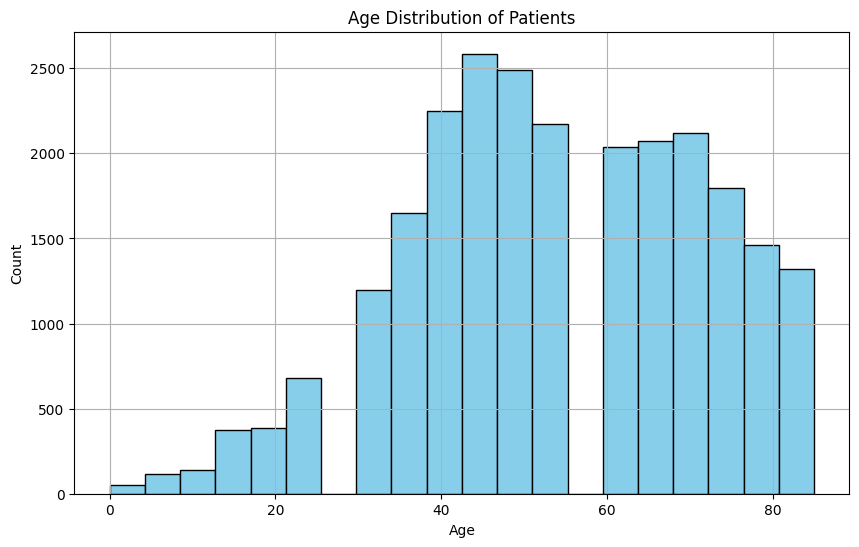

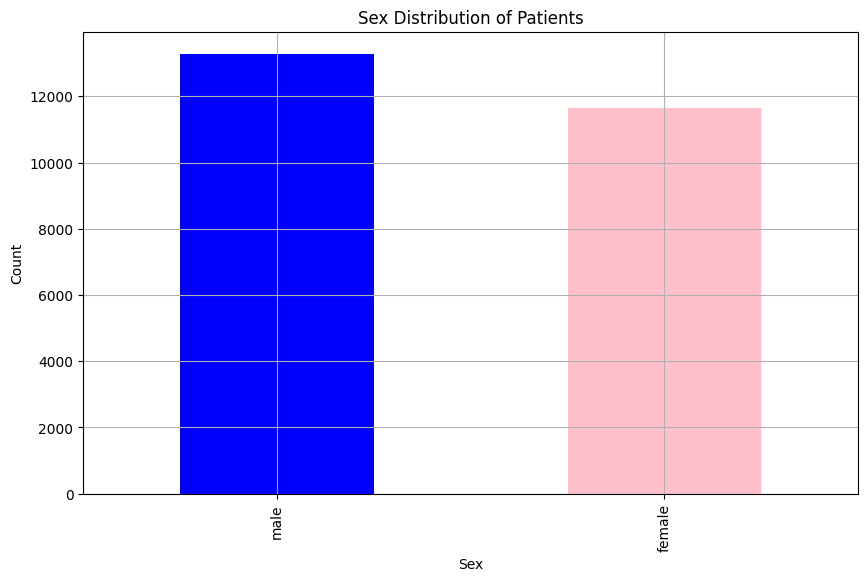

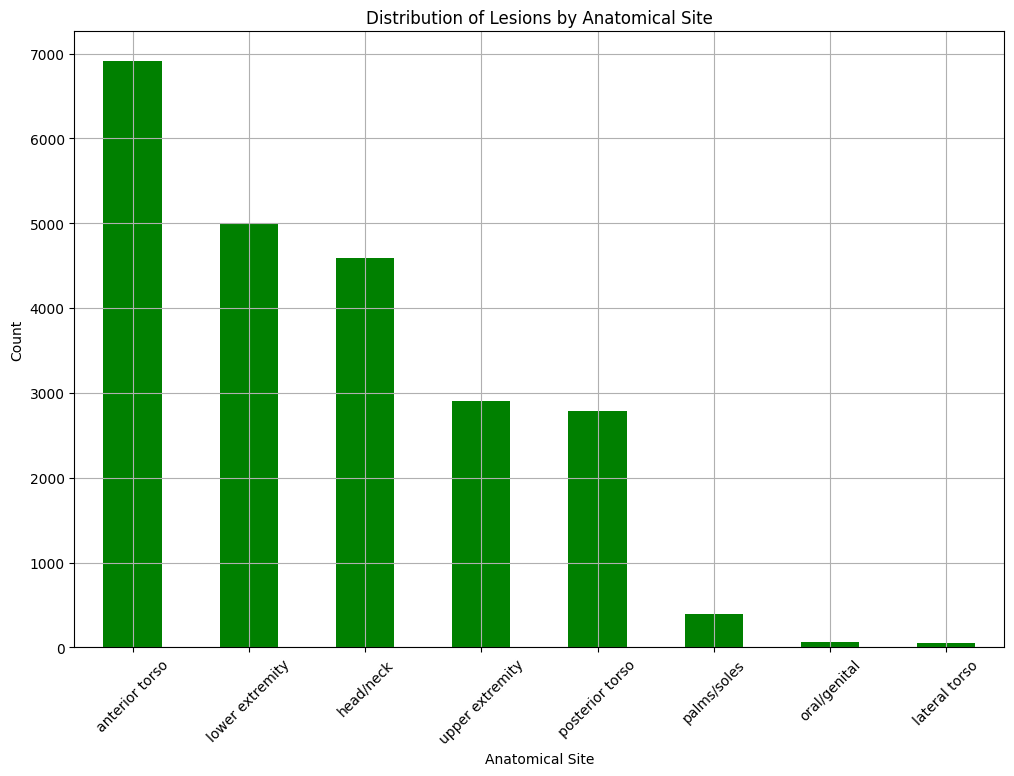

In [3]:
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(metadata_df['age_approx'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Sex Distribution
plt.figure(figsize=(10, 6))
sex_distribution.plot(kind='bar', color=['blue', 'pink'])
plt.title('Sex Distribution of Patients')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Anatomical Site Distribution
plt.figure(figsize=(12, 8))
anatom_site_distribution.plot(kind='bar', color='green')
plt.title('Distribution of Lesions by Anatomical Site')
plt.xlabel('Anatomical Site')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Analysis of Potential Biases

**Age Distribution**
The age distribution is relatively spread out, with patients ranging from young adults to elderly individuals. However, there seems to be a higher concentration of patients in the middle age range (40-70 years). This could indicate a potential bias towards this age group.

**Sex Distribution**
The dataset contains a slightly higher number of male patients (13,286) compared to female patients (11,661). This imbalance might introduce a gender bias in training AI models, potentially affecting the model's performance and accuracy across genders.

**Anatomical Site Distribution**
The distribution of lesions across different anatomical sites shows that certain areas, like the anterior torso and lower extremity, are more frequently represented. Less common sites may not have enough data, potentially leading to biases in the model's ability to accurately diagnose lesions in those less represented areas."

### Concerns and Recommendations

**Age Bias**
The concentration of patients in the middle age range may lead to AI models that are less accurate for younger and older populations. It would be beneficial to ensure a more even age distribution or apply techniques to balance the dataset.

**Sex Bias**
The slight imbalance in gender representation should be addressed to ensure that AI models are equally effective for both male and female patients. Techniques such as data augmentation or sampling methods could help mitigate this bias.

**Anatomical Site Bias**
To improve model generalization, it's important to ensure that all anatomical sites are adequately represented. If certain sites are underrepresented, additional data collection or synthetic data generation could be considered.
